#Intro to RNNs

DNNs often have a dificult time processing time series data as the input data needs to be inputted as a single data point, or the DNN needs to be able to reference previous time points while fitting data.

Furthermore, the problem of disappearing gradients occurs when sigmoid activations calculate a small gradient as a result of several million/billion parameters across several layers (Also another reason why relu is preferred). This gradient becomes so small that the model would require an arbitrarily large amount of epochs to train since backpropagating an arbitrarily small gradient would have little impact on the activations.

RNNs fix this problem by deciding what previous calculations should be used to influence calculations while the model is fitting. Specific layers perform this task and then feed the information into a set of classifier layers that send an output. This perserves time series data and the allows prior calculations to influence future ones in order to prevent small gradient updates.

![alt text](https://lh3.googleusercontent.com/proxy/qC7bP_rNp8AbPCR2gKYAbeVQqo0TZW5dELa1kRud2E0ZkKOs-m7sdTR6613A8emm__t3pYrPcy0S2-rPPma9JYLwM_YXj7ucWj0Y2ta0QIw)

![alt text](https://miro.medium.com/max/3032/1*yBXV9o5q7L_CvY7quJt3WQ.png)

In each RNN layer, data is fed into the layer and based on the weights of that layer, the RNN chooses what to forget, and what to add onto a future input. Calculating what to add and what to forget is looped throughout every datapoint similar to a for loop.

Above are examples of state of the art RNN layers that are used everywhere. The activation layers are the layers choosing what to "forget" and the concatenation are the layers choosing what to "add to the future data".

![alt text](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png)

Note that this model doesn't have a loss function or weights. The weights are imbeded in the multiplication and addition sign, gradient descent propagates an update the same way as regular network: (Also note that the derivative of tanh is more expensive than the sigmoid so relu is often subsituted for one of these activations).

![alt text](https://2.bp.blogspot.com/-ZxJ87cWjPJ8/TtLtwqv0hCI/AAAAAAAAAV0/9FYqcxJ6dNY/s1600/gradient+descent+algorithm+OLS.png)

Except the partial derivative is calculated every activation layer and the gradient of the cost function is needed to calculate the loss in a particular direction. Thus the RNN layer needs to propagate n partial derivatives (where n is # of features) to calculate a change in the weights.

RNNs are often used for NLP (Natural Language Processing) because temporal and spatial hierarchies are preserved. Typical algorithms take the amount of words and the type of words, but do not take in account their position and the time elapsed from a word. This allows RNNs to stand out because they account for these flaws and more.

Keras handles lstms and grus but data transformation is still needed in order to use these layers.

#Preprocessing data for RNNs

In order to process words, they are "Tokenized" or split into several tokens: (Each sentence has its own tensor and contains each tokenized word). 

![alt text](https://freecontent.manning.com/wp-content/uploads/Chollet_DLfT_01.png)

Sentence tensor:


```
[["The","Cat","Sat","On","The","Mat","."], ["The","Cat","Took","The","Hat","."]] #Then each word is tokenized
```


Also note that words are case sensitive.

Typically words are one hot encoded by letter and then concantenated to a sentence tensor and a row's length = largest word.

![alt text](https://assets.website-files.com/5ac6b7f2924c656f2b13a88c/5b873726ab29dbea4f33ae80_Screen%20Shot%202018-08-27%20at%202.32.03%20PM.png)

If this method is not used, a word dictionary where each word is assigned an index and then each word is one hot encoded. This one hot encoded vector is then kept in the word dictionary.

Note that a one hot encoded word tensor would be absolutely huge because words such as "The" would need to be padded in order to account for a row. Instead, word vectors are used. Word vectors are essentially encoded words but instead of encoding each letter, the entire word is assigned to a vector. This vector is also calculated in relation to other words: (This creates a relation between words allowing for better predictive power)

![alt text](https://i.ytimg.com/vi/wvsE8jm1GzE/maxresdefault.jpg)

Each MNIST number is clustered in relation to eachother (There are several false positives due to picture similarities)

![alt text](https://miro.medium.com/max/612/1*j-ZDkqDKmkH7XVkE0MckUQ.png)

Distances between vectors indicate relation and vectors can be concantenated to produce a new vector. This is super useful as you can derive relations from other vectors.

![alt text](https://raw.githubusercontent.com/ZackAkil/nlp-using-word-vectors/master/images/cosine1.png)

Word vectors have to be learned as relations are not magically produced from nowhere. This process is done in tandem with training a model. Since learning word vectors are similar to training a model, word vectors can be loaded in from an external dataset (Word2Vec is a popular dataset)

###Code for preprocessing data

In [0]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000) #Given a dataset, only considers the top 1000 most common words
tokenizer.fit_on_texts(samples) #Creates a word dictionary/index 

sequences = tokenizer.texts_to_sequences(samples) #Creates tensor of integer indicies from dictionary ([1,2,3,4,5],[2,3,4,1,5])

In [0]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary') #Raw one hot encoding 

In [0]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index)) #Recovers word indicies and returns dictionary

In [0]:
from keras import preprocessing

maxlen = 100

x_test = preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen) #Padding a tensor incase data samples are not equal size

#Project description:

The IMDB dataset (a common ML dataset) will be used in conjunction with keras to predict if a movie review is positive or negative. Note that this model can be carried over to other problems as the use of words include a spatial hierarchy (position of words matter). 

Processing data:

In [0]:
#Pickling the dataset, needs to run only once
'''
############# === Processing data only needs to run once properly === #############
import os, shutil  
from tqdm.auto import tqdm as tqdm

from google.colab import drive
drive.mount('/content/drive')

#Goal: label and organize data

features = []
labels = []

categories = ["neg","pos"]
data_dir_origin = '/content/drive/My Drive/Datasets/imdb_ds/{}'
for label in categories:
  data_dir = '/content/drive/My Drive/Datasets/imdb_ds/{}'.format(label)
  for file_name in tqdm(os.listdir(data_dir)):
    print(file_name)
    #print(file_name[-4:])

    try:

      if file_name[-4:] == '.txt':
        f = open(os.path.join(data_dir,file_name)) #Opening and reading the file object.
        features.append(f.read()) #Appending the data read from the read object.
        f.close()
      if label == 'neg':
        labels.append(label)
      if label == 'pos':
        labels.append(label)

    except Exception as e:
      #Exception is a general exception it is not defined it will give whatever the error was
      print("Something went wrong", e)

import pickle as pic

DATA_PATH = '/content/drive/My Drive/Datasets/Pickles'
 
pickle_file = open(DATA_PATH + '/features_imdb.pickle',"wb") 
 
pic.dump(features, pickle_file)
pickle_file.close()

################################################################################

DATA_PATH = '/content/drive/My Drive/Datasets/Pickles'
  
pickle_file = open(DATA_PATH + '/labels_imdb.pickle',"wb") 
 
pickle.dump(labels, pickle_file)
pickle_file.close()
'''

In [13]:
import pickle
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = '/content/drive/My Drive/Datasets and Pickles/Pickles_Old'
infile1 = open(DATA_PATH + '/features_imdb.pickle',"rb")
features = pickle.load(infile1)
infile = open(DATA_PATH + '/labels_imdb.pickle',"rb")
labels = pickle.load(infile)

features = np.asarray(features)
labels = np.asarray(labels)

if "neg" and "pos" in labels:
  print("Data checked")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data checked


Encoding the outputs

In [14]:
print(len(labels))
for i, j in enumerate(labels):
  try:
    if j == "neg":
      labels[i] = 0
    if j == "pos":
      labels[i] = 1
  except Exception as e:
    pass #Do not do this in production model


print(labels)
print(len(labels))

17263
['0' '0' '0' ... '1' '1' '1']
17263


Here I will be using ```tensorflow.keras.preprocessing``` to process data before feeding it into the RNN as well as an embedding layer to learn word vectors.

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import numpy as np

max_features = 10000 #Using only 10000 most frequent words
maxlen = 500 #limits all of the reviews to 500 words
batch_size = 32

tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(features)
sequences = tokenizer.texts_to_sequences(features)

data = sequence.pad_sequences(sequences, maxlen = maxlen) #Cutting down to 500 words

#The following code creates indicies for a combined tensor, randomizes the index, and then assigns the feature and label to the index aligning the data.
#This will only work if the features and labels are matching beforehand.
indicies = np.arange(data.shape[0])
np.random.shuffle(indicies)
data = data[indicies]
labels = labels[indicies]
np.asarray(labels)

X_data = data[0:500]
y_data = labels[0:500]

X_test = data[500:2000]
y_test = labels[500:2000]

Creating the model

In [0]:
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,GRU,Embedding

################################## === Reccurent layers === ##################################
model = Sequential()

#Do not insert dropout
model.add(Embedding(max_features , 32))
model.add(GRU(32,
              dropout = 0.1,
              return_sequences = True, #Returns each output at the end of a reccurent loop
              ))
#Do not insert dropout
model.add(GRU(64,
              dropout = 0.1,
              recurrent_dropout = 0.5)) #Specified temporal dropout mask

################################## === Model === ##################################

model.add(Flatten())

#model.add(Dropout(0.2))
model.add(Dense(16,
                activation = 'relu',
                kernel_regularizer=regularizers.l2(0.01)
                ))
model.add(Dropout(0.2))

model.add(Dense(1,activation = "sigmoid"))
################################## === Compile === ##################################

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc']
              )

In [20]:
history = model.fit(X_data,y_data,
                    epochs = 100,
                    batch_size = 128,
                    validation_split = 0.3)

Train on 350 samples, validate on 150 samples
Epoch 1/100
350/350 [==============================] - 6s 17ms/sample - loss: 0.9231 - acc: 0.6486 - val_loss: 0.8913 - val_acc: 0.6867
Epoch 2/100
350/350 [==============================] - 4s 12ms/sample - loss: 0.8594 - acc: 0.7371 - val_loss: 0.8474 - val_acc: 0.6867
Epoch 3/100
350/350 [==============================] - 4s 12ms/sample - loss: 0.7919 - acc: 0.7371 - val_loss: 0.8328 - val_acc: 0.6867
Epoch 4/100
350/350 [==============================] - 4s 12ms/sample - loss: 0.7673 - acc: 0.7371 - val_loss: 0.8249 - val_acc: 0.6867
Epoch 5/100
350/350 [==============================] - 4s 12ms/sample - loss: 0.7080 - acc: 0.7371 - val_loss: 0.8098 - val_acc: 0.6867
Epoch 6/100
350/350 [==============================] - 4s 12ms/sample - loss: 0.6769 - acc: 0.7371 - val_loss: 0.7991 - val_acc: 0.6867
Epoch 7/100
350/350 [==============================] - 4s 12ms/sample - loss: 0.6182 - acc: 0.7429 - val_loss: 0.8063 - val_acc: 0.6867
Ep

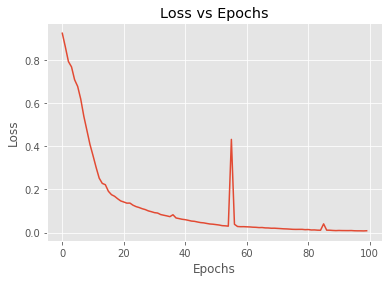

In [27]:
import matplotlib.pyplot as plt

epochs = [i for i in range(0,100)]
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.style.use("ggplot")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.plot(epochs,loss)

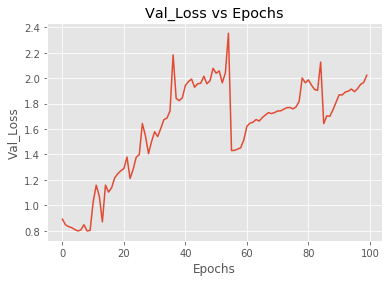

In [30]:
plt.xlabel("Epochs")
plt.ylabel("Val_Loss")
plt.title("Val_Loss vs Epochs")
plt.plot(epochs,val_loss)

As seen above, the model quickly overfits. This is in part due to the word embedding layer not being fully representing the entire dataset due to the data not being cleaned. The val_loss being so high makes this model unusable, but it can be drastically improved using an NLP model, NLP processing, and an imported word vector lib (Word2Vec).